## Challenge: What Test to Use?
In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings(action='once')

In [2]:
df = pd.read_csv("EuroHappy.csv")
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [4]:
# Take a look at the year column
df['year'].value_counts()

7    4297
6    4297
Name: year, dtype: int64

### Looks like there is a small amount of missing data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2347: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):


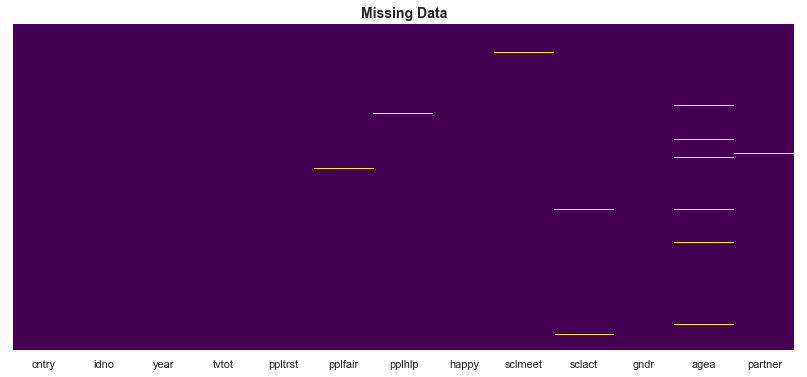

In [5]:
# Missing data?
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis').set_title('Missing Data', fontweight='bold', fontsize=14)
plt.show()

# 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

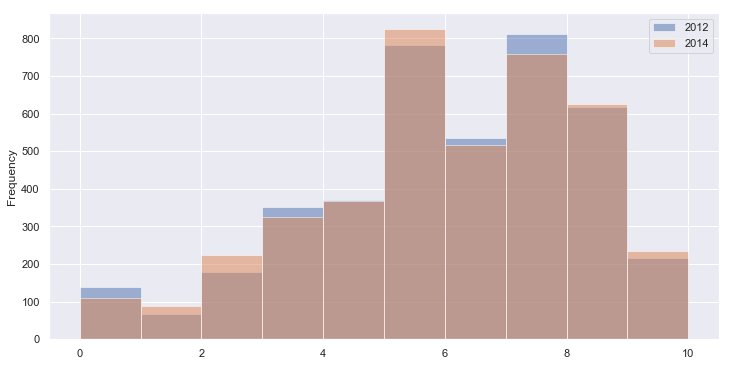

In [6]:
# Start with an overall look
# This is by no means a normal distribution.  Normal-esque? Ish?
plt.figure(figsize=(12,6))
data_2012 = pd.DataFrame(df[df['year']==6].dropna())
data_2014 = pd.DataFrame(df[df['year']==7].dropna())

data_2012['ppltrst'].plot(kind='hist', legend=True, label='2012', alpha=0.5)
data_2014['ppltrst'].plot(kind='hist', legend=True, label='2014', alpha=0.5)
plt.show()

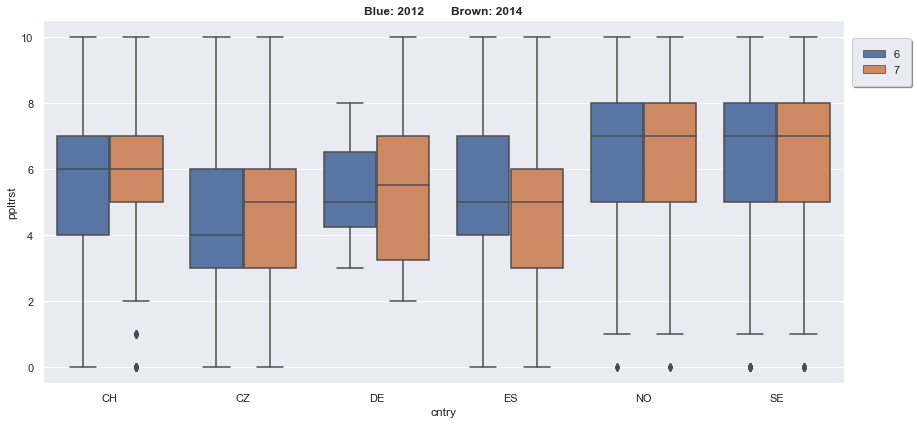

In [7]:
# I could fix the legend, but already burned too much time fiddling with it
plt.figure(figsize=(12,6))
sns.boxplot(x="cntry", y="ppltrst", hue='year', data=df).set_title('Blue: 2012        Brown: 2014', fontweight='bold')
plt.tight_layout()
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=(1.01,0.82))
plt.show()

### This is a dependent A/B test: same people experiencing different stimulus (in this case, time).  I'll run a regular ttest for paired samples, but put more faith in the nonparemetric Wilcoxon
It looks like both tests concur actually, showing Spain and Sweden as the only countries that are statistically different between the years (both tests showing p < 0.05)

In [8]:
for country in df['cntry'].unique().tolist():
    x = data_2012[df['cntry'] == country]['ppltrst']
    y = data_2014[df['cntry'] == country]['ppltrst']

    # A bit of a hack here to make lengths agree so the Wilcox will run
    lenx, leny = len(x), len(y)
    #print(lenx, '\t', leny)
    if lenx > leny:
        x = x[:leny]
    else:
        y = y[:lenx]
    
    print(country, '\t', stats.ttest_rel(x, y))
    print('\t', stats.wilcoxon(x, y), '\n')

CH 	 Ttest_relResult(statistic=-0.685503936789268, pvalue=0.4932433040188394)
	 WilcoxonResult(statistic=97323.0, pvalue=0.5553997503173174) 

CZ 	 Ttest_relResult(statistic=0.3309358230335794, pvalue=0.7408085007445435)
	 WilcoxonResult(statistic=70943.0, pvalue=0.8339189113309622) 

DE 	 Ttest_relResult(statistic=-0.6684373647831918, pvalue=0.5165064656723359)
	 WilcoxonResult(statistic=30.5, pvalue=0.5022609941677378) 

ES 	 Ttest_relResult(statistic=2.1512250255992353, pvalue=0.03166935799305661)
	 WilcoxonResult(statistic=205134.5, pvalue=0.0242005176212083) 

NO 	 Ttest_relResult(statistic=0.5462752312298897, pvalue=0.5850490996185177)
	 WilcoxonResult(statistic=78707.0, pvalue=0.6406594408625819) 

SE 	 Ttest_relResult(statistic=-2.074422015535839, pvalue=0.0383378027404032)
	 WilcoxonResult(statistic=118894.0, pvalue=0.04299772898275245) 



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

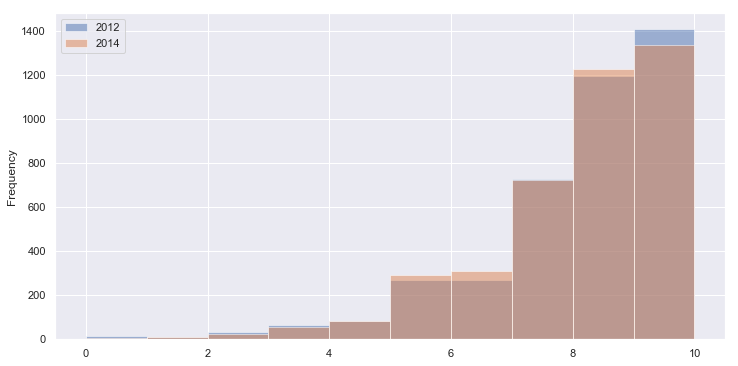

In [9]:
plt.figure(figsize=(12,6))
data_2012 = df[df['year']==6].dropna()
data_2014 = df[df['year']==7].dropna()
data_2012['happy'].plot(kind='hist', legend=True, label='2012', alpha=0.5)
data_2014['happy'].plot(kind='hist', legend=True, label='2014', alpha=0.5)
plt.show()

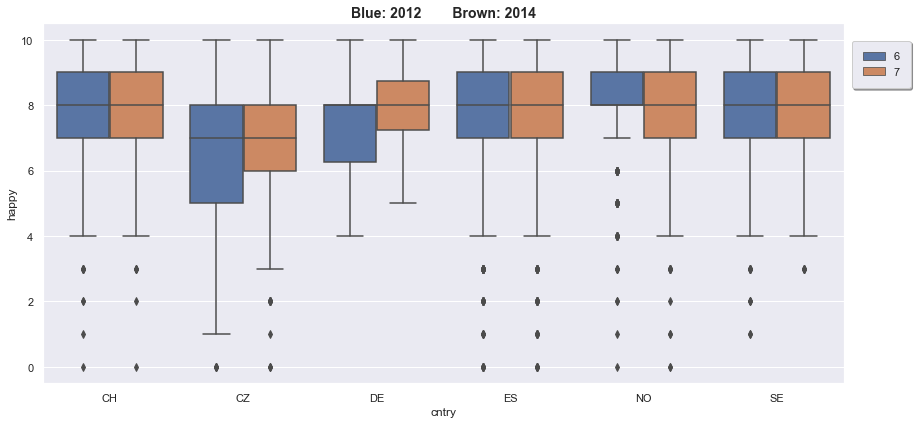

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x="cntry",
            y="happy",
            hue='year',
            data=df).set_title('Blue: 2012        Brown: 2014', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=(1.01,0.82))
plt.show()

### Same as above, dependent test.  NOT NORMAL, so only non-parametric is relevant.  I'm going to run the parametric test just for comparison
Interesting.  The tests agree about the Czech Rep. and Spain, and are split on Germany and Switzerland (though only if you use 0.05, a different cutoff might make them agree)

In [11]:
for country in df['cntry'].unique().tolist():
    x = data_2012[df['cntry'] == country]['happy']
    y = data_2014[df['cntry'] == country]['happy']

    # A bit of a hack here to make lengths agree so the Wilcox will run
    lenx, leny = len(x), len(y)
    #print(lenx, '\t', leny)
    if lenx > leny:
        x = x[:leny]
    else:
        y = y[:lenx]
    
    print(country, '\t', stats.ttest_rel(x, y))
    print('\t', stats.wilcoxon(x, y), '\n')

CH 	 Ttest_relResult(statistic=-0.7800633792362622, pvalue=0.43560606784786937)
	 WilcoxonResult(statistic=72908.5, pvalue=0.5767042949680168) 

CZ 	 Ttest_relResult(statistic=-1.0703576573050146, pvalue=0.2848887319230953)
	 WilcoxonResult(statistic=61773.5, pvalue=0.38263492515573405) 

DE 	 Ttest_relResult(statistic=-0.7030499101780563, pvalue=0.49543876166584)
	 WilcoxonResult(statistic=17.0, pvalue=0.5071224553598253) 

ES 	 Ttest_relResult(statistic=1.3860590934427537, pvalue=0.16600158102705556)
	 WilcoxonResult(statistic=212608.0, pvalue=0.17284338638135865) 

NO 	 Ttest_relResult(statistic=4.149373860727647, pvalue=3.739949572463859e-05)
	 WilcoxonResult(statistic=64696.0, pvalue=1.6078039491474595e-05) 

SE 	 Ttest_relResult(statistic=-0.48955055558479654, pvalue=0.6245771053748665)
	 WilcoxonResult(statistic=110648.0, pvalue=0.72351428366515) 



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


# 3. Who reported watching more TV in 2012, (1) men or (2) women?¶
According to the Mann-Whitney test, the results are significant, and to me personally, surprising.  Somehow I imagined more men in Europe watching TV more often.

In [12]:
data_2012.groupby(['gndr'])['tvtot'].mean()

gndr
1.0    3.859230
2.0    3.905352
Name: tvtot, dtype: float64

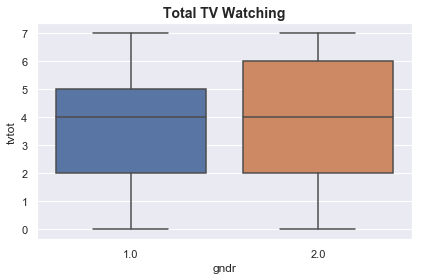

In [13]:
sns.boxplot(x="gndr", y="tvtot", data=data_2012).set_title('Total TV Watching',
                                                            fontweight='bold',
                                                            fontsize=14)
plt.tight_layout()
plt.show()

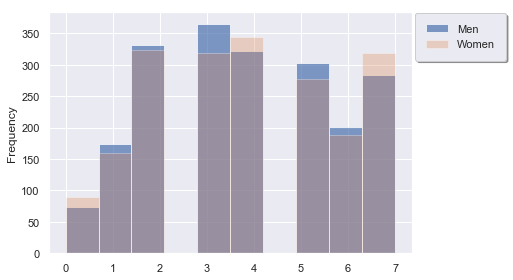

In [14]:
# Not what I would call a normal distribution
data_2012[data_2012['gndr']==1]['tvtot'].plot(kind='hist', legend=True, label='Men', alpha=0.7)
data_2012[data_2012['gndr']==2]['tvtot'].plot(kind='hist', legend=True, label='Women', alpha=0.3)
plt.tight_layout()
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=(1.01,0.8))
plt.show()

### I believe this calls for a Mann-Whitney, as these are independent groups, not normally distributed

In [15]:
print(stats.mannwhitneyu(data_2012[data_2012['gndr'] == 1]['tvtot'], data_2012[data_2012['gndr'] == 2]['tvtot']))

MannwhitneyuResult(statistic=2042391.5, pvalue=0.2165401933322842)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:4885: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


# 4. Who was more likely to believe people were fair in 2012, (1) people living with a partner or (2) people living alone?

In [16]:
data_2012.groupby(['partner'])['pplfair'].mean()

partner
1.0    6.074351
2.0    5.865925
Name: pplfair, dtype: float64

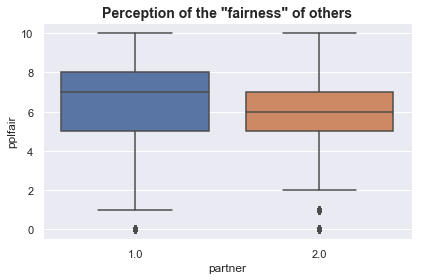

In [17]:
sns.boxplot(x="partner", y="pplfair", data=data_2012).set_title('Perception of the "fairness" of others',
                                                            fontweight='bold',
                                                            fontsize=14)
plt.tight_layout()
plt.show()

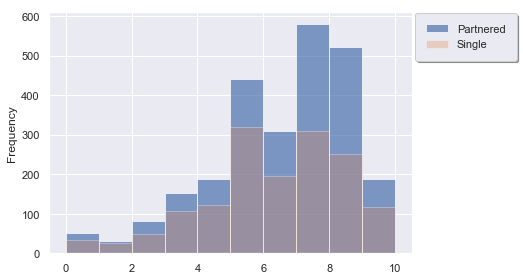

In [18]:
# More normal than previous one, but still not great.  Going with nonparametric.
data_2012[data_2012['partner']==1]['pplfair'].plot(kind='hist', legend=True, label='Partnered', alpha=0.7)
data_2012[data_2012['partner']==2]['pplfair'].plot(kind='hist', legend=True, label='Single', alpha=0.3)
plt.tight_layout()
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=(1.01,0.8))
plt.show()

### I believe this calls for a Mann-Whitney again... Not normally distributed
And, this looks VERY significant.  Which, if you look at the histogram above, it's obvious....

In [19]:
print(stats.mannwhitneyu(data_2012[data_2012['partner'] == 1]['pplfair'],
                         data_2012[data_2012['partner'] == 2]['pplfair']))

MannwhitneyuResult(statistic=1819821.5, pvalue=0.00028258143613772957)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:4885: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


# 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
Quite a good showing from the Swedes, and the Spaniards are on top, as expected.  The Czechs really drop off....

In [20]:
# I think the Czeck Rep, Spain, and Sweden should be interesting, and different.  I expect more of a showing
# from the Spaniards!!
countries = ['CZ', 'ES', 'SE']

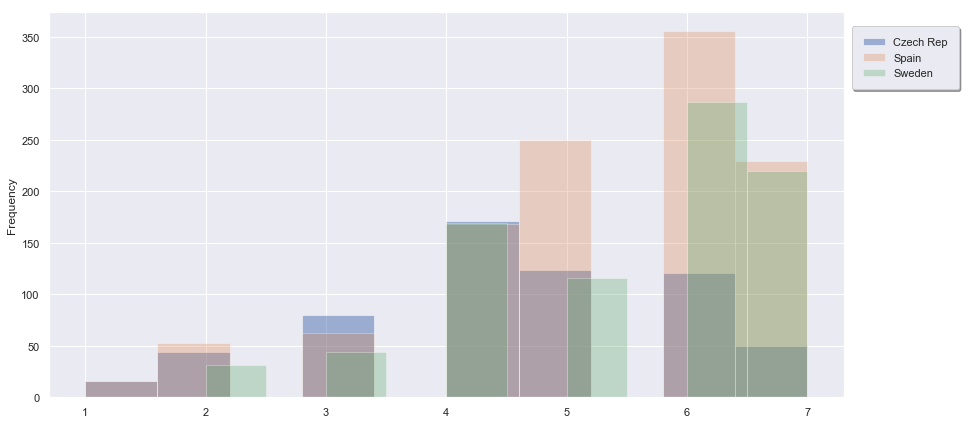

In [21]:
# Again, not normally distributed
plt.figure(figsize=(12,6))

data_2014[data_2014['cntry']== 'CZ']['sclmeet'].plot(kind='hist', legend=True, label='Czech Rep', alpha=0.5)
data_2014[data_2014['cntry']== 'ES']['sclmeet'].plot(kind='hist', legend=True, label='Spain', alpha=0.3)
data_2014[data_2014['cntry']== 'SE']['sclmeet'].plot(kind='hist', legend=True, label='Sweden', alpha=0.3)

plt.tight_layout()
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=(1.01,0.8))
plt.show()

### Kruskal-Wallace makes sense here
Again, just look at the histogram, the difference is verified below... look at that p-val

In [22]:
stats.kruskal(
    data_2014[data_2014['cntry']== 'CZ']['sclmeet'],
    data_2014[data_2014['cntry']== 'ES']['sclmeet'],
    data_2014[data_2014['cntry']== 'SE']['sclmeet'])

KruskalResult(statistic=164.73114903229128, pvalue=1.6946713557834595e-36)

# 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

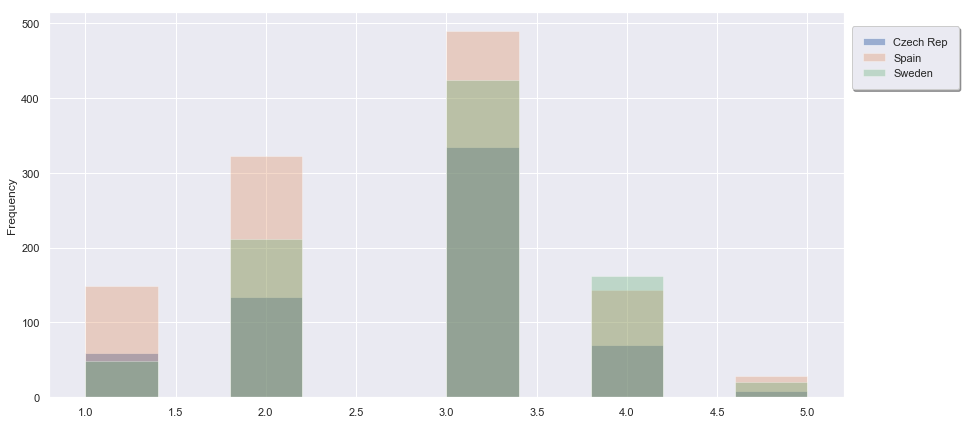

In [23]:
# Again, not normally distributed, though it's a bit better
plt.figure(figsize=(12,6))

data_2014[data_2014['cntry']== 'CZ']['sclact'].plot(kind='hist', legend=True, label='Czech Rep', alpha=0.5)
data_2014[data_2014['cntry']== 'ES']['sclact'].plot(kind='hist', legend=True, label='Spain', alpha=0.3)
data_2014[data_2014['cntry']== 'SE']['sclact'].plot(kind='hist', legend=True, label='Sweden', alpha=0.3)

plt.tight_layout()
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=(1.01,0.8))
plt.show()

### Kruskal-Wallace again
The results are unsurprising, if you just look at the histogram

In [24]:
stats.kruskal(
    data_2014[data_2014['cntry']== 'CZ']['sclact'],
    data_2014[data_2014['cntry']== 'ES']['sclact'],
    data_2014[data_2014['cntry']== 'SE']['sclact'])

KruskalResult(statistic=36.9246206112881, pvalue=9.592250484702523e-09)